# Práctica Guiada: Clustering

## 1. Preparando los datos

# <center>
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR_z4GT2bY3HmLtHlRmRVm1oygMgUUvz6o8ryX3vAMo65iIftAD'>


### Introducción

**Objetivo:** Realizar una análisis de clustering a partir del algoritmo _k-means_ utilizando el viejo y ya ampliamente conocido dataset de _iris_

Primero vamos a importar las librerías necesarias:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

Usaremos **Scikit-Learn** para nuestro análisis

In [2]:
#Importamos IRIS data set
iris_dataset = datasets.load_iris()

Dado que este dataset ya está "formateado" del modo que `sklearn` necesita, es posible utilizar los métodos que tiene este objeto para ver la información:

In [3]:
iris_dataset.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [4]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
y = iris_dataset.target

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

===================================================================================================================
**Notar** que _target_ es la variable categórica que nos indica a que tipo de especie pertenece:

* 0 --->  'setosa' 
* 1 --->  'versicolor'
* 2 --->  'virginica' 


El algoritmo K-Means toma valores numéricos, si la variable categórica hubiese sido de tipo _string_, tendríamos que haber redefinido dicha variable. 

Por ejemplo:

~~~
       `def name_to_numeric(x):
            if x=='setosa':
                return 0
            if x=='virginica':
                return 1
            if x=='versicolor':
                return 2`                
~~~
=====================================================================================================================

Usando Pandas nos armamos un DataFrame del estilo (ejemplo de forma)


SepalLength |	SepalWidth	|PetalLength|	PetalWidth|	Name_num
---------------|------------|------------|--------------|------------
5.1|3.5|1.4|0.2|0
4.9|3.0|1.4|0.2|0
4.7|3.2|1.3|0.2|1
4.6|3.1|1.5|0.2|2
5.0|3.6|1.4|0.2|0
...|...|...|...|...

In [7]:
#Armamos las primeras cuatro columnas
df = pd.DataFrame(iris_dataset.data,  columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])

#Le agregamos la columna 'name_num' con los valores de la variable "target"
df['name_num']=iris_dataset.target

#Revisamos las primeras filas
df.head(n=5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,name_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Ahora vamos a plotear los datos para ver las distribuciones:

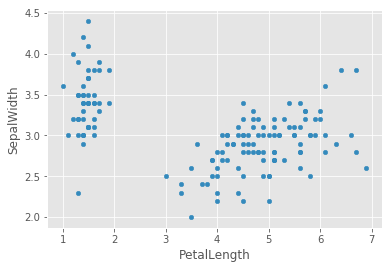

In [8]:
df.plot(kind='scatter',x='PetalLength',y='SepalWidth')

Si ejecutamos este gráfico varias veces usando combinaciones de factores diferentes - podemos ver que independientemente de los factores que tracemos, parece que hay dos grupos distintos emergentes - esto nos ayudará con la siguiente parte de nuestro análisis: ejecutar la prueba k-means

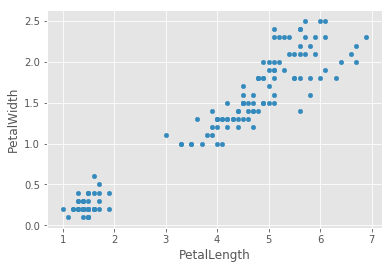

In [9]:
df.plot(kind='scatter',x='PetalLength',y='PetalWidth')

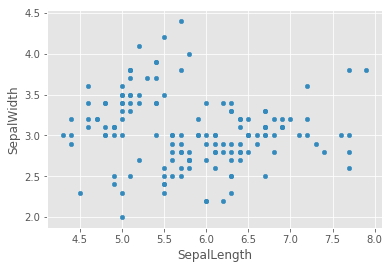

In [10]:
df.plot(kind='scatter',x='SepalLength',y='SepalWidth')

## 2. Implementando el clustering

#### Antes de realizar la prueba de k-means, todavía hay algunas transformaciones que hacer:

Convertimos nuestros datos en un Numpy Array:

In [11]:
dn = df.as_matrix(columns=None)

Ya estamos listos! (¿podriamos haber obtenido la matriz de otra forma?)
> Respuesta: Sí... `dn2 = np.array(df)`

Ahora que hemos formateado nuestros datos y hemos comprendido sus estructuras, finalmente podemos ir y agrupar.

Vamos a establecer __k=2__ dado el comportamiento que vimos arriba en nuestros gráficos.

In [12]:
k = 2
kmeans = cluster.KMeans(n_clusters=k, random_state=0) #Como siempre, suele ser una buena práctica fijar la semilla
kmeans.fit(dn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

Podemos utilizar las funciones integradas de Scikit para determinar las ubicaciones de los centroides y sus etiquetas:

In [13]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## 3. Visualizando los clusters

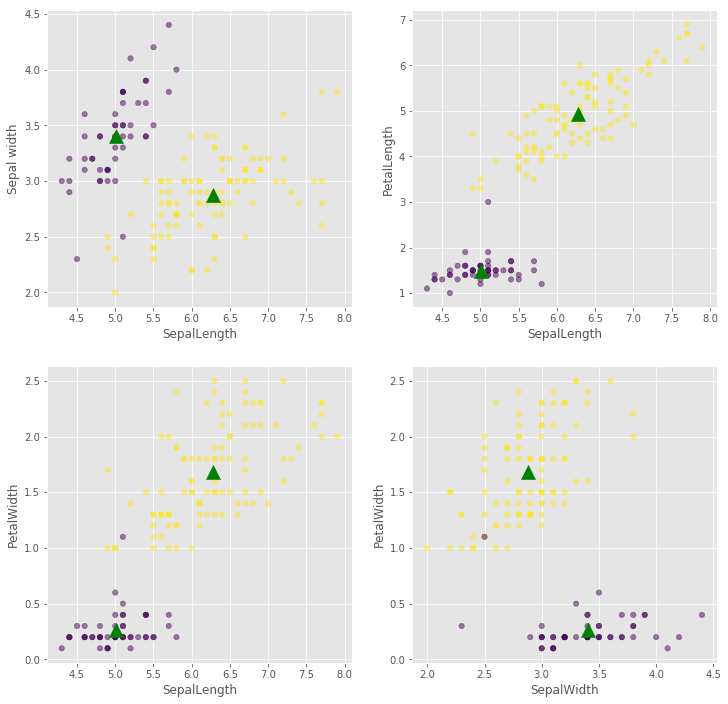

In [14]:
plt.figure(figsize=(12, 12))

ax1=plt.subplot(221)
#puntos
ax1.scatter(dn[:, 0], dn[:, 1], c=labels,alpha=0.5,s=30)
#centroides
ax1.scatter(centroids[0][0],centroids[0][1], c='g',s=200,marker=u'^')
ax1.scatter(centroids[1][0],centroids[1][1], c='g',s=200,marker=u'^')

ax1.set_xlabel('SepalLength')
ax1.set_ylabel('Sepal width')

ax2=plt.subplot(222)
#puntos
ax2.scatter(dn[:, 0], dn[:, 2], c=labels,alpha=0.5,s=30)
#centroides
ax2.scatter(centroids[0][0],centroids[0][2], c='g',s=200,marker=u'^')
ax2.scatter(centroids[1][0],centroids[1][2], c='g',s=200,marker=u'^')

ax2.set_xlabel('SepalLength')
ax2.set_ylabel('PetalLength')

ax3=plt.subplot(223)
#puntos
ax3.scatter(dn[:, 0], dn[:, 3], c=labels,alpha=0.5,s=30)
#centroides
ax3.scatter(centroids[0][0],centroids[0][3], c='g',s=200,marker=u'^')
ax3.scatter(centroids[1][0],centroids[1][3], c='g',s=200,marker=u'^')

ax3.set_xlabel('SepalLength')
ax3.set_ylabel('PetalWidth')

ax4=plt.subplot(224)
#puntos
ax4.scatter(dn[:, 1], dn[:, 3], c=labels,alpha=0.5,s=30)
#centroides
ax4.scatter(centroids[0][1],centroids[0][3], c='g',s=200,marker=u'^')
ax4.scatter(centroids[1][1],centroids[1][3], c='g',s=200,marker=u'^')

ax4.set_xlabel('SepalWidth')
ax4.set_ylabel('PetalWidth')

## 4. Evaluando los clusters

Ahora, usemos algunas de las medidas que vimos recién para evaluar los clusters que construimos.

In [15]:
import sklearn.metrics as sm

In [16]:
predY = np.choose(labels, [0, 1, 2]).astype(np.int64)

### 4.1 Validación Externa

En este caso (poco habitual) tenemos una variable externa (la especie de la flor) que "coincide" con los clusters -conceptualmente hablando-. Habitualmente, quizás podamos encontrar alguna de alguna variable a la que podemos considerar como altamente correlacionada con nuestros clusters y que podamos usar como fuente de validación externa de nuestro clustering.

#### 4.1.1 Accuracy

In [17]:
sm.accuracy_score(y, predY)

0.66000000000000003

#### 4.1.2 Classification Report

In [18]:
print(sm.classification_report(y, predY))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        50
          1       0.49      0.98      0.66        50
          2       0.00      0.00      0.00        50

avg / total       0.49      0.66      0.55       150



/home/facu_tk/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 4.1.3 Confusion Matrix

In [19]:
print(sm.confusion_matrix(y, predY))

[[50  0  0]
 [ 1 49  0]
 [ 0 50  0]]


### 4.2 Validación Interna

#### 4.2.1 Silhouette Score 

In [20]:
sm.silhouette_score(dn, predY, metric='euclidean')

0.67980279788123221

#### 4.2.2 Calinsky-Harabaz Index

In [21]:
sm.calinski_harabaz_score(dn, predY)  

497.15735363859966

### BONUS

Evalúen cómo funcionan diferentes cantidad de clusters utilizando algunas de las herramientas que hemos visto. ¿Cuál creen que sería el k óptimo para el clustering del dataset de iris?

In [22]:
evaluation = []
evaluations = []
for k in range(2,29):
    kmeans = cluster.KMeans(n_clusters=k, random_state=0) #Como siempre, suele ser una buena práctica fijar la semilla
    kmeans.fit(dn)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    predY = np.choose(labels, pd.Series(range(0,k+1)).astype(np.int64))
    silhouette = sm.silhouette_score(dn, predY, metric='euclidean')
    calinsky = sm.calinski_harabaz_score(dn, predY)      
    evaluation = [k, silhouette, calinsky]
    evaluations.append(evaluation)
    print("K= ", evaluation)

K=  [2, 0.67980279788123221, 497.15735363859966]
K=  [3, 0.58169370709909018, 583.81960935630764]
K=  [4, 0.54253075980415755, 519.07945340757203]
K=  [5, 0.51343494088045205, 525.13774484086741]
K=  [6, 0.39258783858333363, 497.0351122585588]
K=  [7, 0.39349777416947895, 501.85819620640348]
K=  [8, 0.38820614093054312, 486.02978766836219]
K=  [9, 0.3437142097263684, 447.04221911412435]
K=  [10, 0.33423230972385548, 424.59876647753998]
K=  [11, 0.30000135485920965, 414.24477590872868]
K=  [12, 0.31106383279204031, 399.62624299475755]
K=  [13, 0.31110005703575905, 387.33300203529467]
K=  [14, 0.30233927514834857, 378.87975043477059]
K=  [15, 0.27938173553536816, 361.91251834248811]
K=  [16, 0.30488695591404641, 364.84019970403619]
K=  [17, 0.28790527206560329, 349.69840951076509]
K=  [18, 0.28056012592477325, 344.13323318851479]
K=  [19, 0.31209726858542253, 344.4851701371889]
K=  [20, 0.30180560069136281, 350.38566053639244]
K=  [21, 0.28789186054128646, 334.37178718795911]
K=  [22, 0.

In [23]:
pd.DataFrame(evaluations)

,0,1,2
0,2,0.679803,497.157354
1,3,0.581694,583.819609
2,4,0.542531,519.079453
3,5,0.513435,525.137745
4,6,0.392588,497.035112
5,7,0.393498,501.858196
6,8,0.388206,486.029788
7,9,0.343714,447.042219
8,10,0.334232,424.598766
9,11,0.300001,414.244776
